In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [6]:
! git clone https://github.com/ShawnLiu119/Telco-Customer-Churn-Prediction.git

Cloning into 'Telco-Customer-Churn-Prediction'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [7]:
!cd /content/Telco-Customer-Churn-Prediction

### pd.read_csv(parse_dates = ) to deal with datetime

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [52]:
data_path = '/content/Telco-Customer-Churn-Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###EDA

In [10]:
df.info()

#total charge should be numeric, rather than charge
#no missing values or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#####separate numeric and categprical columns/

In [53]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN.

In [54]:
df.isnull().sum() ##finding all missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

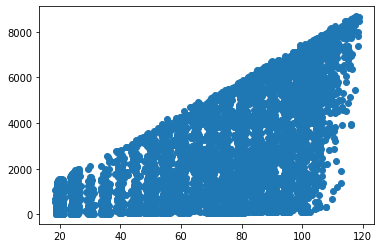

In [55]:
#since there are only 11 missing values in Total charge, we can either remove them or inpute with median??

plt.scatter(df['MonthlyCharges'], df['TotalCharges'] )
#we can tell there is no strong correlation between monthlycharge and total charge, the varance even increases

In [56]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [57]:
#explore categorical and numeric feature separately

col = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(col) - set(num_cols))

print(cat_cols, num_cols)

['Contract', 'InternetService', 'Dependents', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'Churn', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'gender', 'TechSupport', 'PaymentMethod', 'OnlineBackup', 'StreamingMovies', 'StreamingTV', 'customerID'] Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [58]:
##another way to do this is df.select_dtypes

num_df = df.select_dtypes(include = ['number']) # select all numerical, include 'int64', 'float64',
cat_df = df.select_dtypes(include = ['object', 'bool']) # cat_df = df.select_dtypes(include = ['category']) does not work, return empty


In [59]:
#Features in class

# 1. demogrpahic: gender,  seniroCitizen, partner, dependents
# 2. Customer account and activity: rest 

In [60]:
#customer_id contains little info, considered not relevant to the prediction

df = df.drop(columns=['customerID'], axis=1)

In [61]:
# To add label value on the bar chart, need to self define a function
def addlabels(x,y): 
    for i in range(len(x)):
        plt.text(i, y[i], y[i])  #first two are coordinate position, third one is value; if it is categorical variable, then you can not use x[i] as x-axis since it is textual values

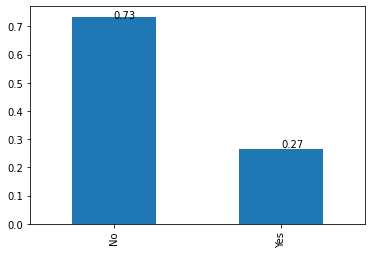

In [62]:
#explore the target variable

# df['Churn'].value_counts().plot(kind='bar') 
df['Churn'].value_counts(normalize=True).plot(kind='bar')
addlabels(df['Churn'].value_counts(normalize=True).index.values.tolist(), df['Churn'].value_counts(normalize=True).round(2).values)
#normalize shows %

EDA General Practice

- y vs x: heatmap of correlation, scatter, stack/distribution of y per individual x variable

- y alone: bar chart (normalize) to detect whether the data is imbalanced or not

- x-numeric variables: histogram, distribution, description of stats

- x-categorical variables: stack/h/ bar chart

In [63]:
# numeric variable visualization
df.describe()  #quick overlook the stats of numeric variables

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


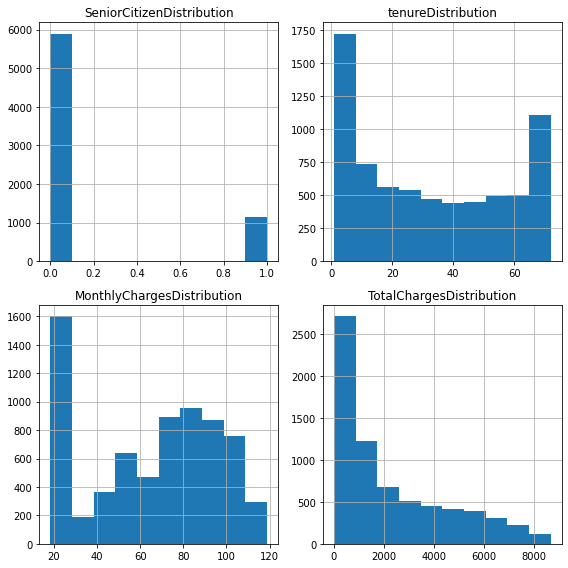

In [47]:
#histogram for all numeric variables

def draw_histogram(df, num_var, n_rows, n_cols):
    fig = plt.figure(figsize=(8,8))
    for i, var in enumerate(num_var):
        ax = fig.add_subplot(n_rows, n_cols, i+1)    #the order of subplot starts with 1
        df[var].hist(bins=10, ax=ax)  #ax --> the ax to plot the chart on
        ax.set_title(var + 'Distribution')
    fig.tight_layout()
    plt.show()

df_num = df.select_dtypes(include='number')
num_col = df.select_dtypes(include='number').columns

draw_histogram(df_num,num_col, 2,2)

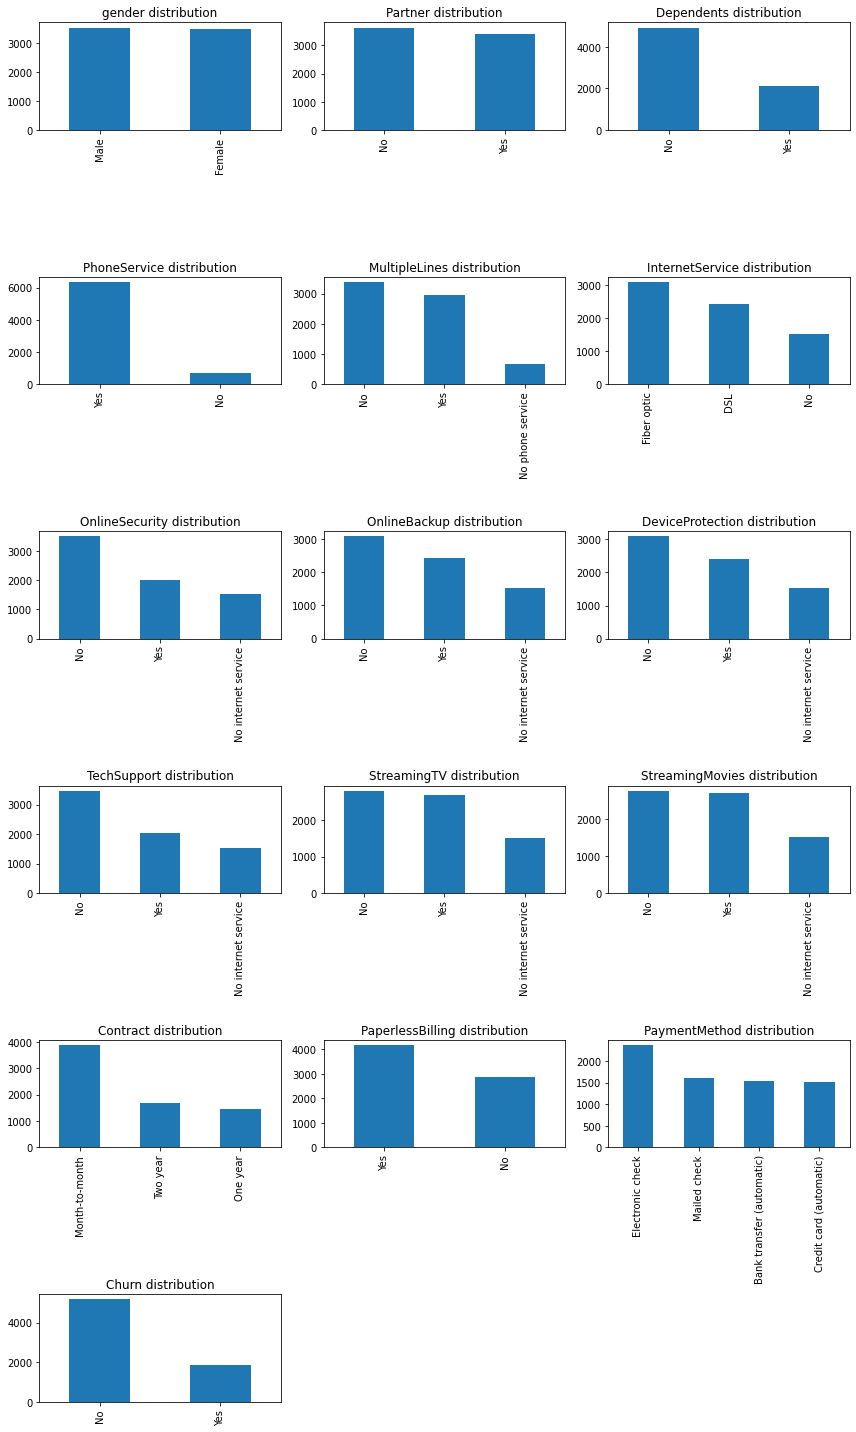

In [65]:
#catogrical features

def draw_bar(df, cat_var, n_rows, n_cols):
    fig = plt.figure(figsize=(12,20))
    for i, var in enumerate(cat_var):
        ax = fig.add_subplot(n_rows, n_cols, i+1)    #the order of subplot starts with 1
        df[var].value_counts().plot(kind='bar') #ax --> the ax to plot the chart on
        ax.set_title(var + ' distribution')
    fig.tight_layout()
    plt.show()


df_cat = df.select_dtypes(exclude='number')
cat_col = df_cat.columns

draw_bar(df_cat,cat_col, 6,3)

In [92]:
# encode categorical variable to numbers

#for a cateogrical variable with n unique values, one-hot encoder can create n-1 columns by "drop=first"
#https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db

from sklearn.preprocessing import OneHotEncoder


def oh_trans(df):
    ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)
    #"drop=first", drop the first category to avoid multicolinearity
    #"sparse=false" return an array instead of sparse column
    df_cat = df.select_dtypes(exclude='number')
    df_num = df.select_dtypes(include='number')

    df_cat_oh = pd.DataFrame(ohe.fit_transform(df_cat)) #tranformed result is an object
    cat_oh = ohe.get_feature_names_out() #get_feature_names_out() will return tranformed one hot column name
    df_cat_oh.columns = cat_oh

    df_new = pd.concat([df_num, df_cat_oh], axis=1)

    return df_new

df_1 = oh_trans(df)


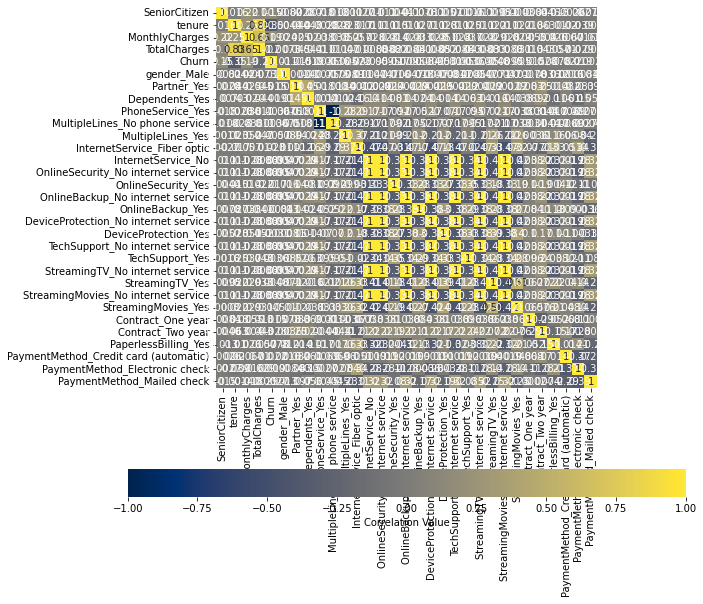

In [95]:
# y vs x relationship

def draw_corr(df):
    cor_df = df.corr()
    plt.subplots(figsize=(10,10))
    sns.heatmap(cor_df, 
                cmap = "cividis",
                annot = True, 
                square = True, 
                cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'})
    
draw_corr(df_1)

In [96]:
df_1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [97]:
##from the correlation heatmap, we can tell there are bunch of intercorrelation between certain features, we need to do some feature engineer
#since multiple features with "no internet service" show colinearity, I will remove them or categorize them, just leave one 

df_2 = df_1.drop(['OnlineSecurity_No internet service', 
                  'DeviceProtection_No internet service',
                  'TechSupport_No internet service',
                  'StreamingTV_No internet service',
                  'StreamingMovies_No internet service'], axis=1)

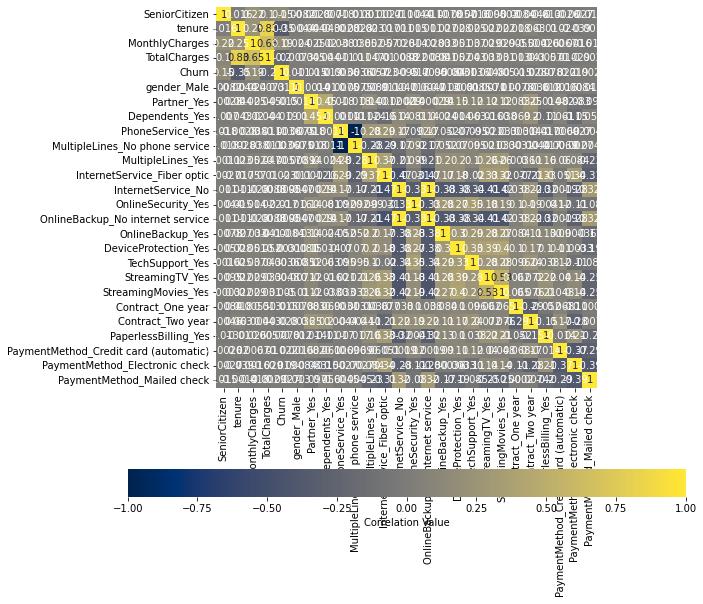

In [99]:
draw_corr(df_2)

###Data Preprocessing (split, normalize)

###Model Selection & Development

###Medel Performance Evaluation 